### Column Descriptions:
- customerID: Unique identifier for each customer.
- gender: Gender of the customer (Male, Female).
- SeniorCitizen: Whether the customer is a senior citizen or not (1: Yes, 0: No).
- Partner: Whether the customer has a partner or not (Yes, No).
- Dependents: Whether the customer has dependents or not (Yes, No).
- tenure: Number of months the customer has stayed with the company.
- PhoneService: Whether the customer has a phone service or not (Yes, No).
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service).
- InternetService: Type of internet service the customer has (DSL, Fiber optic, No).
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service).
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service).
-DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service).
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service).
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service).
- Contract: The contract term of the customer (Month-to-month, One year, Two year).
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No).
- PaymentMethod: The payment method of the customer (Electronic check, Mailed check, Bank transfer, Credit card).
- MonthlyCharges: The amount charged to the customer monthly.
- TotalCharges: The total amount charged to the customer.
- Churn: Whether the customer churned or not (Yes, No).

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum


In [78]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [79]:
df = data.drop('customerID', axis=1)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [81]:

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'].isnull().sum())

0


In [82]:
numerical_cols = [col for col in df.columns if df[col].dtypes in ['int64','float64']]
print(f'Numerical Colums: {numerical_cols}')

Numerical Colums: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [83]:
for col in df.columns:
    if col not in numerical_cols:
        print(f"{col}: {df[col].unique()}")
        print('-' * 50)


gender: ['Female' 'Male']
--------------------------------------------------
Partner: ['Yes' 'No']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
PhoneService: ['No' 'Yes']
--------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV: ['No' 'Yes' 'No internet service']
--------------------------------------------------

In [84]:
def map_zero_one(df, columns):
    for col in columns:
        df[col] = df[col].map({'No': 0, 'Yes':1})
    return df 

yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df = map_zero_one(df, yes_no_cols)   


In [85]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(['Male', 'Female'])

LabelEncoder()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [87]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


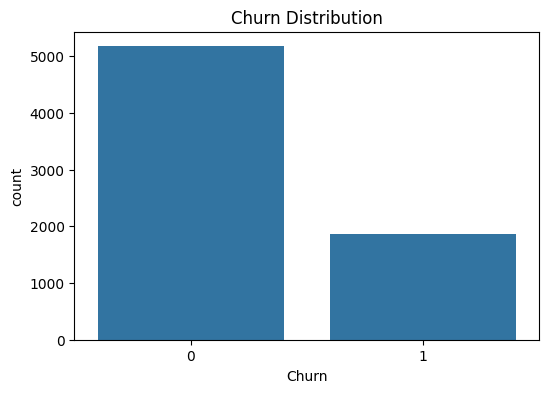

In [88]:
plt.figure(figsize=(6,4))
sns.countplot(data=df , x='Churn')
plt.title('Churn Distribution')
plt.show()

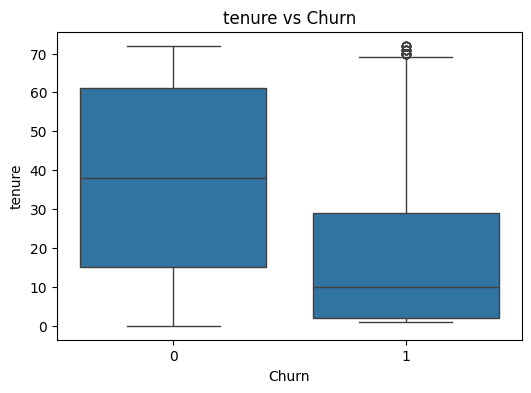

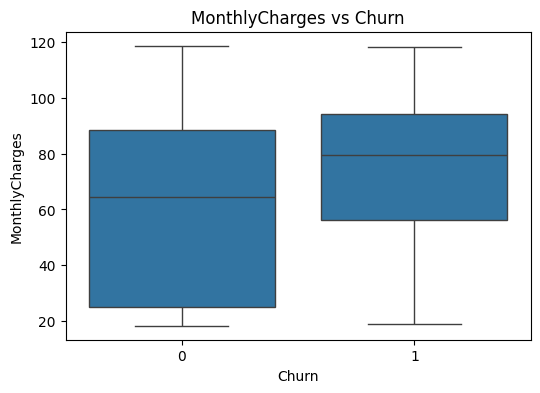

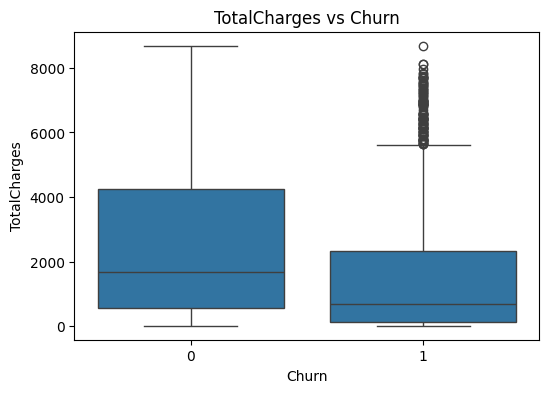

In [89]:
# Boxplots for numeric columns vs target
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

In [90]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
numerical_features = [col for col in X.columns if df[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in X.columns if df[col].dtype in ['object', 'category']]
print('Numerical Columns:', numerical_features)
print('Categorical Columns:', categorical_features)

Numerical Columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [92]:
preprocessing = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [93]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'KNeighborsClassifier' :KNeighborsClassifier(),
    'SVC' : SVC()
}

In [94]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing' , preprocessing),
        ('model' , model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')  
    mean_score = scores.mean()
    print(f"{name}: Accuracy_score = {mean_score:.4f}")


LogisticRegression: Accuracy_score = 0.8016
RandomForestClassifier: Accuracy_score = 0.7856
DecisionTreeClassifier: Accuracy_score = 0.7302
GradientBoostingClassifier: Accuracy_score = 0.7998
KNeighborsClassifier: Accuracy_score = 0.7540
SVC: Accuracy_score = 0.7978


In [95]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.8218594748048261
Confusion Matrix:
 [[934 102]
 [149 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [ ]:
# import joblib

# # Save the trained pipeline
# joblib.dump(pipeline, 'loan_defaulter_model.pkl')
# print("✅ Model saved successfully!")

✅ Model saved successfully!
